In [1]:
# 运行此段做数据准备
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

img1 = cv.imread('OIP-C.jpeg', 0)


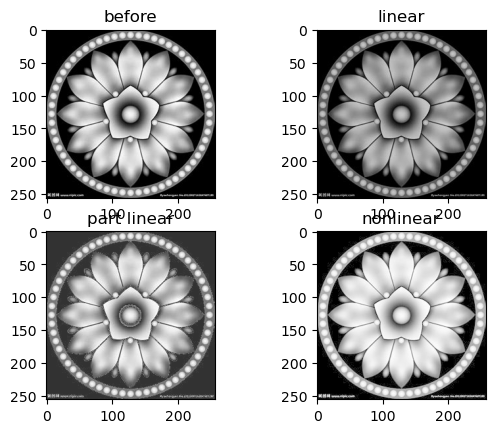

In [2]:
# 对原图像做三种运算处理，作图时将四幅图像放在一起做对比

# 原图像
figure1 = plt.figure()
plt.subplot(221)
plt.title("before")
plt.imshow(img1, 'gray')

# 灰度线性运算，灰度压缩
a = 0.8
b = 0
img2 = a * img1 + b
plt.subplot(222)
plt.title("linear")
plt.imshow(img2, 'gray', vmin=0, vmax=255)

# 灰度分段线性运算，此处将灰度小于50部分灰度增大
a = 2.0
b = 50
img3 = np.empty(img1.shape)
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        if img1[i][j] < 50:
            img3[i][j] = a * img1[i][j] + b
        else:
            img3[i][j] = img1[i][j]
plt.subplot(223)
plt.title("part linear")
plt.imshow(img3, 'gray', vmin=0, vmax=255)

# 灰度非线性运算，这里取0.5次幂，增亮减暗
img4 = (img1 / 255.) ** 0.5  # 此处先进行归一化，再进行运算
plt.subplot(224)
plt.title("nonlinear")
plt.imshow(img4, 'gray', vmin=0, vmax=1)


下面这一段为bug记录

img1占用内存为 65920
img4占用内存为 65920
img5占用内存为 526464


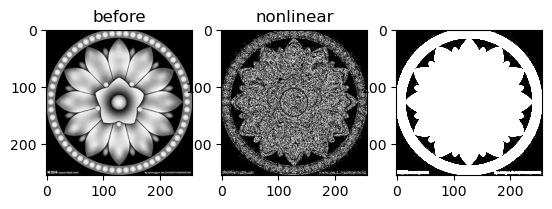

In [3]:
# 此段将三幅图像放在一起

figure2 = plt.figure()
plt.subplot(131)
plt.title("before")
plt.imshow(img1, 'gray', vmin=0, vmax=255)


# 灰度非线性运算
# 此处遇到一个教训，img1 ** 2与img1 ** 2.0运算结果绘制出的图像竟然不同，img1 ** 2的绘图结果毫无规律。
# 严格来讲，上面的运算并不正确，因为在进行幂次运算前应先将灰度归一化
# bug原因是读取图像保存在img1中时，元素默认类型是单字节无符号整型，一部分数据平方运算后数值大于255，出现溢出，结果变得不可控制，而在img ** 2.0时，结果自动转化为了浮点型，不会出现这种情况。bug复现时也发现似乎只有通过cv.imread()得到的数组做平方运算时如此。
img4 = img1 ** 2
img5 = img1 ** 2.0

plt.subplot(132)
plt.title("nonlinear")
plt.imshow(img4, 'gray', vmin=0, vmax=255)
plt.subplot(133)
plt.imshow(img5, 'gray', vmin=0, vmax=255)

# 通过此处输出可以看到，img1和img4占用内存大小相同，都为65920 = 256*257*1+128 = 65792+128，而img5内存大小为526464 = 256*257*8+128 = 526336+128
import sys
print('img1占用内存为', sys.getsizeof(img1))
print('img4占用内存为', sys.getsizeof(img4))
print('img5占用内存为', sys.getsizeof(img5))
